### Problem Statement:

Predict the type of glass based on 9 input features using a classification model.

### Importing necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('glass_multiclass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [4]:
df.shape

(214, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


### Checking skewness of numerical features:

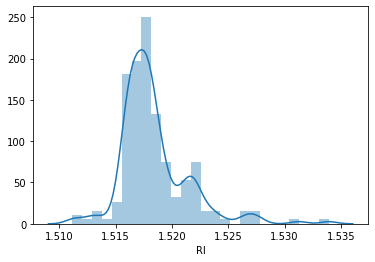

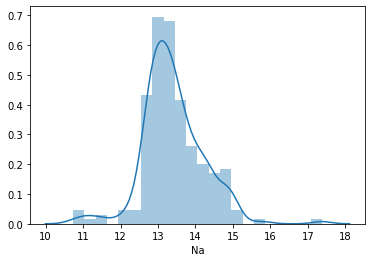

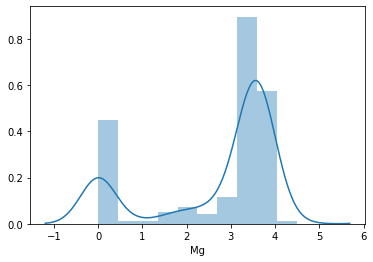

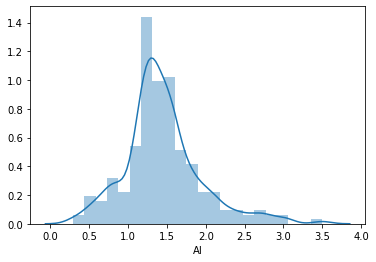

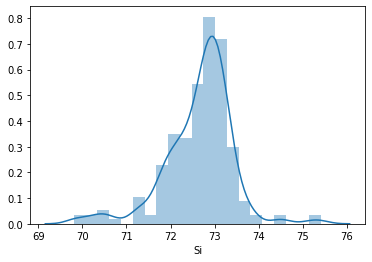

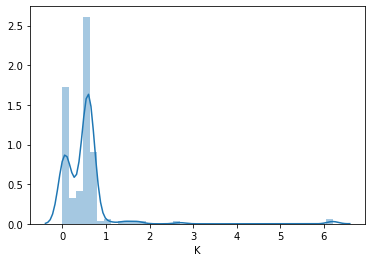

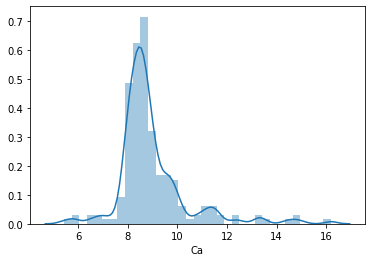

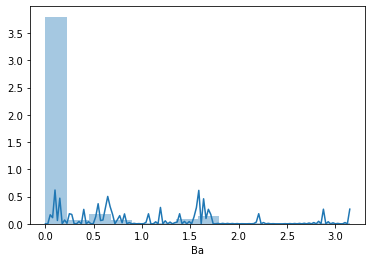

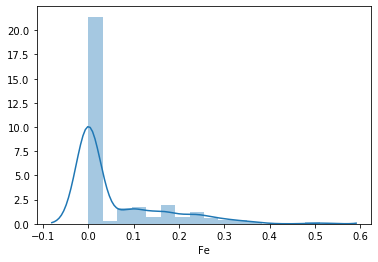

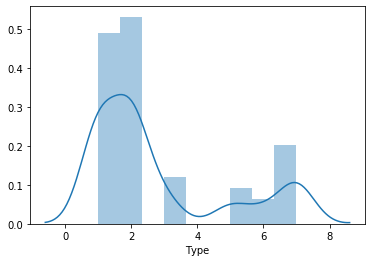

In [6]:
for i in df.select_dtypes(['int64','float64']):
    sns.distplot(df[i])
    plt.show()

### Checking outliers in numerical features:

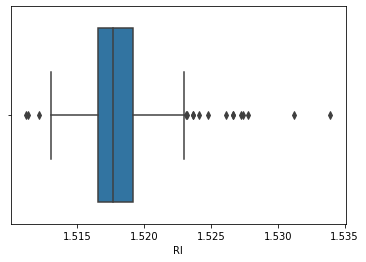

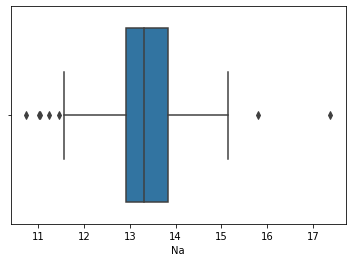

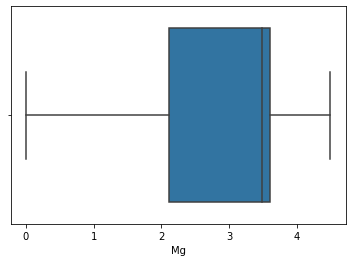

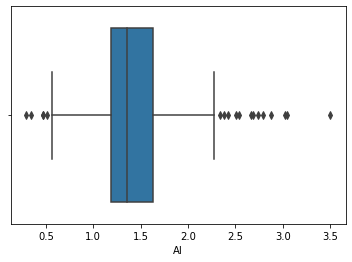

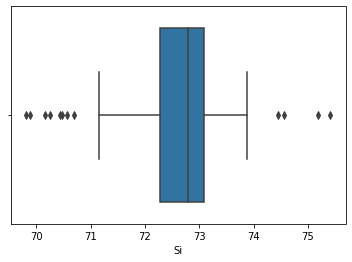

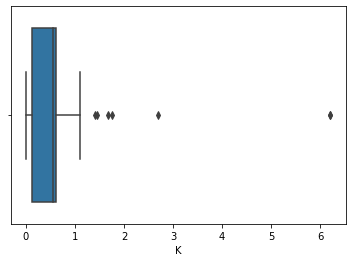

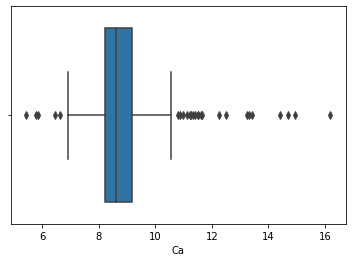

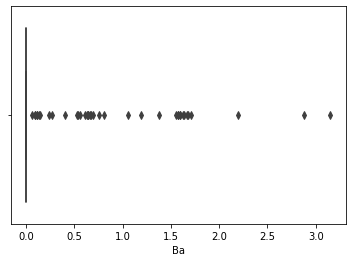

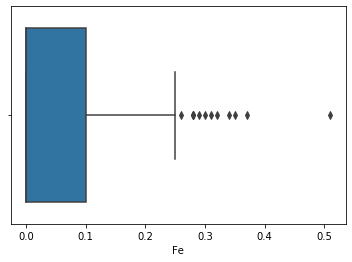

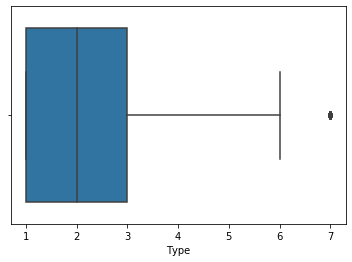

In [7]:
for i in df.select_dtypes(['int64','float64']):
    sns.boxplot(df[i])
    plt.show()

In [8]:
df.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

In [9]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [10]:
l=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [11]:
import scipy.stats as st

In [12]:
for i in l:
    df[i]=st.boxcox(df[i]+1)[0]
df.skew()

D:\Anaconda\lib\site-packages\scipy\stats\morestats.py:910: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)
D:\Anaconda\lib\site-packages\scipy\optimize\optimize.py:2341: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
D:\Anaconda\lib\site-packages\scipy\optimize\optimize.py:1959: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
D:\Anaconda\lib\site-packages\scipy\optimize\optimize.py:1960: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


RI      0.000000
Na     -0.008973
Mg     -0.889528
Al      0.000219
Si      0.130384
K      -0.071816
Ca     -0.209313
Ba      1.824175
Fe      0.858508
Type    1.114915
dtype: float64

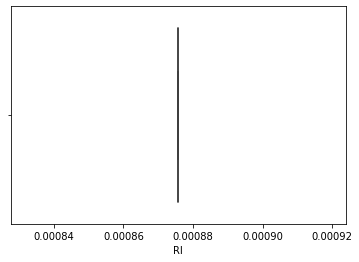

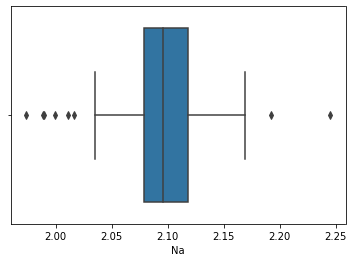

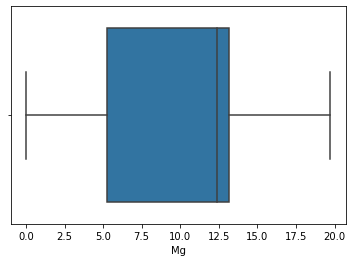

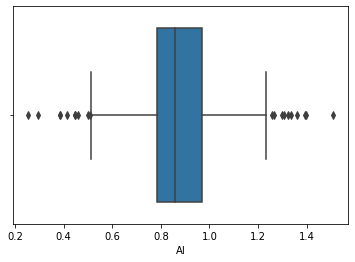

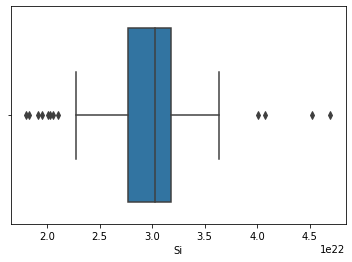

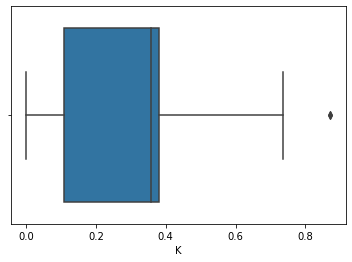

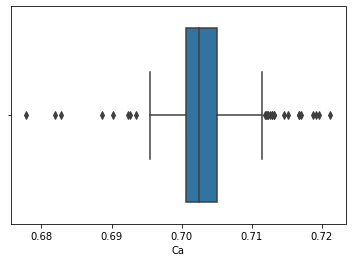

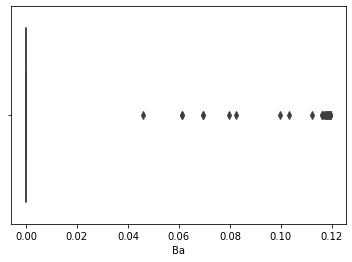

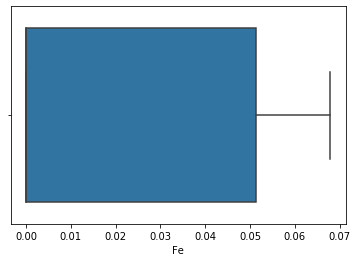

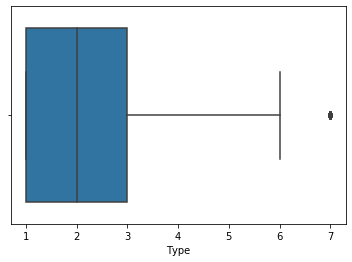

In [13]:
for i in df.select_dtypes(['int64','float64']):
    sns.boxplot(df[i])
    plt.show()

### X,y split:

In [14]:
X=df.drop(['Type'],axis=1)
y=df['Type']

In [15]:
X.shape,y.shape

((214, 9), (214,))

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [18]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
svc=SVC()

In [19]:
models=[]
models.append(('MVLC',lr))
models.append(('KNNC',knn))
models.append(('RFC',rf))
models.append(('SVC',svc))

In [20]:
from sklearn.metrics import classification_report

results=[]
names=[]
y_pred=[]
for name,model in models:
    model.fit(X_train,y_train)
    y_pred= model.predict(X_test)
    print(classification_report(y_test,y_pred))
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)"%(name,np.mean(cv_results)*100,np.var(cv_results,ddof=1)))

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations

              precision    recall  f1-score   support

           1       0.29      1.00      0.45        19
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00        10

    accuracy                           0.29        65
   macro avg       0.05      0.17      0.08        65
weighted avg       0.09      0.29      0.13        65

MVLC: 34.244898 (0.000565)
              precision    recall  f1-score   support

           1       0.46      0.63      0.53        19
           2       0.44      0.52      0.48        23
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         3
           7       0.25      0.30      0.27        10

    accuracy                           0.42       

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Balancing the target variable:

In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE('auto')

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classe

In [22]:
X_sm, y_sm = smote.fit_sample(X_train,y_train)
print(X_sm.shape, y_sm.shape)

(318, 9) (318,)


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\Anaconda\lib\site-packages\sk

In [23]:
pd.Series(y_sm).value_counts()

7    53
6    53
5    53
3    53
2    53
1    53
dtype: int64

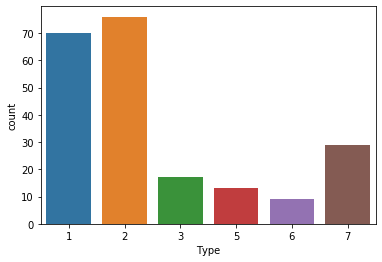

In [24]:
sns.countplot(x='Type',data=df)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_sm, y_sm)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
y_pred= classifier.predict(X_test)

In [27]:
from sklearn import  metrics  
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred, average='weighted'))

0.3384615384615385
0.33368659204572515


In [28]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 42)

In [29]:
modelF = forest.fit(X_sm, y_sm)
y_predF = modelF.predict(X_test)

In [30]:
print(metrics.accuracy_score(y_test, y_predF))
print(metrics.f1_score(y_test, y_predF, average='weighted'))

0.676923076923077
0.6811240042009272


In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
n_estimators = [100, 300, 500]
max_depth = [2, 5, 8, 15]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_sm, y_sm)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   34.5s finished


In [33]:
print (gridF.best_params_)

{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [34]:
best_predF = bestF.predict(X_test)

In [35]:
print(metrics.accuracy_score(y_test, best_predF))
print(metrics.f1_score(y_test, best_predF, average='weighted'))

0.6923076923076923
0.6948696081904338
